### Market Basket Analysis using assocition rules

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

Measure 1: Support. This says how popular an itemset is, it is number of times appear in total number of transaction. in other word we say frequency of item.
    
Measure 2: Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. 
    
Measure 3: Lift.  it is ratio of expected confidance to observed confidance. it is described as confidance of Y when item X was already known(x/y) to the confidance of Y when X item is unknown. in other words confidance of Y w.r.t. x and confiadnce of Y without X (means both are independent to each other).

**support = occurance of item / total no of transaction.**

**confidance = support ( X Union Y) / support(X).**

**lift = support (X Union Y)/ support(X) * support(Y) .**

For more info report this [link](https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html)


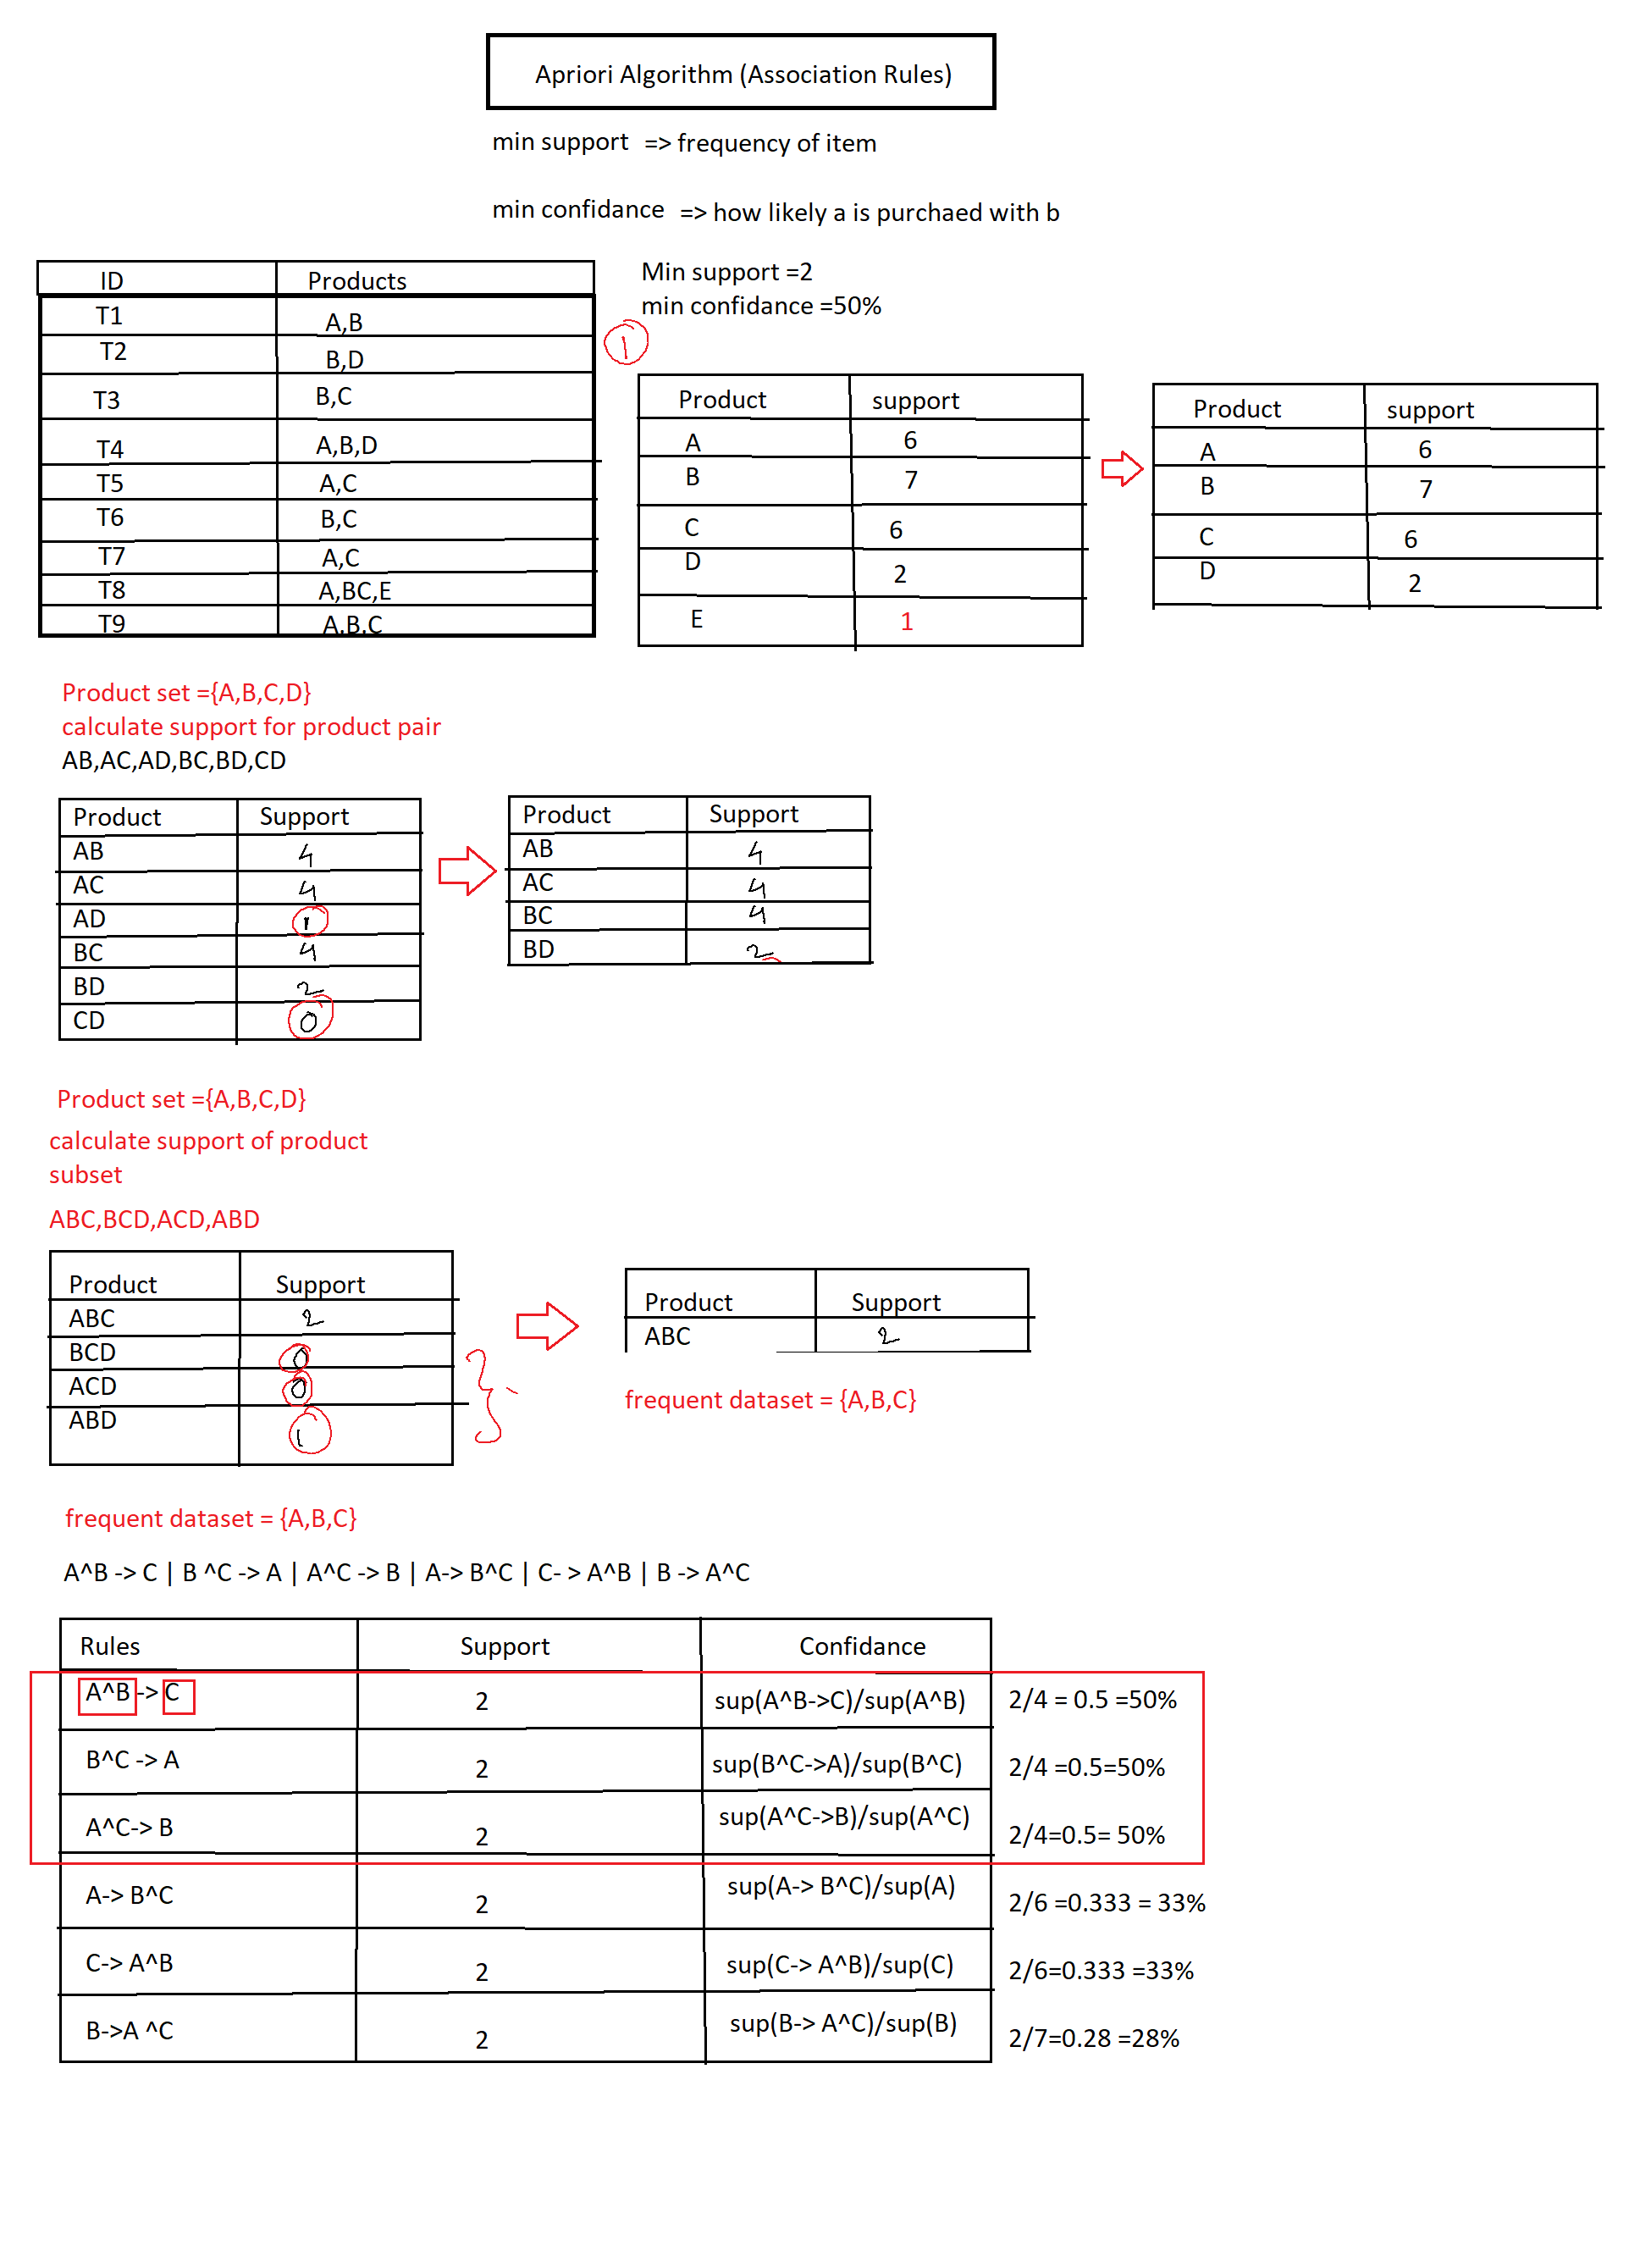

In [1]:
pip install apyori

In [2]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("../Data/Market_Basket_Optimisation.csv",header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [10]:
df.isna().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [12]:
df.shape

(7501, 20)

In [11]:
#replacing empty value with 0.
df.fillna(0,inplace=True)

In [29]:
# storing the transactions in a list
#for using aprori need to convert data in list format..
# transaction = [['apple','almonds'],['apple'],['banana','apple']]....
trans=[]
for i in range(df.shape[0]):
    sub=[]
    for j in range(df.shape[1]):
        if df.values[i,j]!=0:
            sub.append(df.values[i,j])
    trans.append(sub)
    

In [35]:
trans[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [38]:
from apyori import apriori

In [73]:
#Call apriori function which requires minimum support, confidance and lift, min length is combination of item default is 2".
rules=apriori(trans,min_support=0.003,min_confidence=0.2,min_lift=0.3,min_length=2)

In [74]:
help(apriori)

Help on function apriori in module apyori:

apriori(transactions, **kwargs)
    Executes Apriori algorithm and returns a RelationRecord generator.
    
    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).
    
    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).



In [75]:
#it generates a set of rules in a generator file...
rules

<generator object apriori at 0x000001F073B85890>

In [76]:
# all rules need to be converted in a list..
#convert result in a dataframe for further operation...
df_rules=pd.DataFrame(list(rules))

In [77]:
df_rules.head()

,items,support,ordered_statistics
0,(mineral water),0.238368,"[((), (mineral water), 0.23836821757099053, 1.0)]"
1,"(burgers, almonds)",0.005199,"[((almonds), (burgers), 0.25490196078431376, 2..."
2,"(chocolate, almonds)",0.005999,"[((almonds), (chocolate), 0.29411764705882354,..."
3,"(almonds, eggs)",0.006532,"[((almonds), (eggs), 0.3202614379084967, 1.782..."
4,"(french fries, almonds)",0.004399,"[((almonds), (french fries), 0.215686274509803..."


In [78]:
df_rules['ordered_statistics'][0]

[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]

In [79]:
df_rules['ordered_statistics'][0][0][0]

frozenset()

In [80]:
df_rules['ordered_statistics'][0][0][1]

frozenset({'mineral water'})

In [81]:
df_rules['ordered_statistics'][0][0][2]

0.23836821757099053

In [82]:
df_rules['ordered_statistics'][0][0][3]

1.0

In [83]:
#all four empty list which will contain lhs, rhs, confidance and lift respectively.
'''
convert orderstatistic in a proper format.
order statistic has lhs => rhs as well rhs => lhs we can choose any one for convience i choose first one which is 'df_results['ordered_statistics'][i][0]'
''' 
lhs=[]
rhs=[]
conf=[]
lift=[]
# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need to be converted in list..
for i in range(df_rules.shape[0]):
    order_stat=df_rules['ordered_statistics'][i][0]
    lhs.append(order_stat[0])
    rhs.append(order_stat[1])
    conf.append(order_stat[2])
    lift.append(order_stat[3])


In [84]:
#convert all four list into dataframe for further operation..
final_report=pd.DataFrame({"Rule LHS":lhs,"Rule RHS":rhs,"confidence":conf,"lift":lift})

In [85]:
final_report

,Rule LHS,Rule RHS,confidence,lift
0,(),(mineral water),0.238368,1.000000
1,(almonds),(burgers),0.254902,2.923577
2,(almonds),(chocolate),0.294118,1.795099
3,(almonds),(eggs),0.320261,1.782108
4,(almonds),(french fries),0.215686,1.261983
...,...,...,...,...
815,"(ground beef, pancakes)","(mineral water, spaghetti)",0.211009,3.532991
816,"(ground beef, tomatoes)","(mineral water, spaghetti)",0.261364,4.376091
817,"(olive oil, milk, mineral water)",(spaghetti),0.390625,2.243551
818,"(shrimp, milk, mineral water)",(spaghetti),0.389831,2.238988


In [86]:
final_report.sort_values(by='confidence',ascending=False)

,Rule LHS,Rule RHS,confidence,lift
369,"(cereals, ground beef)",(spaghetti),0.676471,3.885303
650,"(soup, frozen vegetables)",(mineral water),0.633333,2.656954
760,"(soup, pancakes)",(mineral water),0.627451,2.632276
776,"(olive oil, tomatoes)",(spaghetti),0.611111,3.509912
787,"(chocolate, frozen vegetables, ground beef)",(mineral water),0.581395,2.439064
...,...,...,...,...
88,(soup),(chocolate),0.200528,1.223888
32,(burgers),(green tea),0.200306,1.516139
783,"(ground beef, eggs)","(chocolate, mineral water)",0.200000,3.797975
813,"(ground beef, milk)","(mineral water, spaghetti)",0.200000,3.348661


In [88]:
final_report[final_report['confidence']>=0.5]

,Rule LHS,Rule RHS,confidence,lift
323,"(olive oil, burgers)",(mineral water),0.520833,2.184995
350,"(cake, frozen smoothie)",(mineral water),0.500000,2.097595
362,"(soup, cake)",(mineral water),0.521739,2.188795
369,"(cereals, ground beef)",(spaghetti),0.676471,3.885303
370,"(cereals, milk)",(mineral water),0.509434,2.137172
376,"(chocolate, chicken)",(mineral water),0.518182,2.173871
391,"(chicken, ground beef)",(spaghetti),0.507042,2.912193
396,"(olive oil, chicken)",(mineral water),0.500000,2.097595
398,"(soup, chicken)",(mineral water),0.533333,2.237435
400,"(chicken, tomatoes)",(mineral water),0.500000,2.097595
